In [268]:
from random import randint
import pandas as pd


def make_sample(size: int) -> list:
    x, y = randint(0, 100), randint(0, 100)
    start_point = (x, y, 'none')
    cities = [start_point]
    n = 1
    step = max(1, size//10)
    while n < size:
        i = -1
        cities = list(set(cities))
        n = len(cities)
        add_city = cities.append
        for _ in range(step):
            try:
                n = add_points(add_city, cities[i], n, size)
                i = randint(max(1, i + 1), len(cities))
            except IndexError:
                break
    return list(set(cities))


def add_points(add_city: callable,
               point: tuple,
               n: int,
               size: int) -> int:
    x, y, previous_position = point
    u, d, r = [randint(0, 1) for _ in range(3)]
    if u and n <= size and previous_position != 'down':
        add_city((x, y + 1, 'up'))
        n += 1
    if d and n <= size and previous_position != 'up':
        add_city((x, y - 1, 'down'))
        n += 1
    if r and n <= size:
        add_city((x + 1, y, 'left'))
        n += 1
    return n


def find_edges(cities: pd.DataFrame):
    cities = cities.copy()
    edges = []
    for x, y, name, _ in cities.values:
        q = f"(x=={x + 1} & y=={y}) | (x=={x - 1} & y=={y}) | (x=={x} & y=={y + 1}) | (x=={x} & y=={y - 1})"
        neighbours = cities.query(q)
        for n_name in neighbours.name:
            edges.append((name, n_name, randint(1, 24)))

    return edges


def generate_csv(size: int, max_q: int = 100, filename: str = 'sample') -> tuple:
    points = make_sample(size)

    df_cities = pd.DataFrame(points, columns=['x', 'y', 'position'])
    df_cities = df_cities.drop('position', axis=1)
    df_cities['name'] = [f'city_{i}' for i in range(df_cities.shape[0])]
    df_cities['quantity'] = [randint(0, max_q) for _ in range(df_cities.shape[0])]

    df_edges = pd.DataFrame(find_edges(df_cities), columns=['city_from', 'city_to', 'time'])
    df_cities.to_csv(f'{filename}_cities.csv', index=False)
    df_edges.to_csv(f'{filename}_paths.csv', index=False)

    return df_cities, df_edges


def validate_input(cities: pd.DataFrame, paths: pd.DataFrame) -> tuple:
    unique_cities = cities.name.unique().tolist()
    unique_cities.sort()

    unique_paths = paths.city_from.unique().tolist() + paths.city_to.unique().tolist()
    unique_paths = list(set(unique_paths))
    unique_paths.sort()

    if len(unique_cities) != len(unique_paths):
        return False, f'{len(unique_cities)} != {len(unique_paths)}'

    if unique_cities != unique_paths:
        return False, 'Some elements differs'

    return True, 'Success'



In [16]:
import matplotlib.pyplot as plt

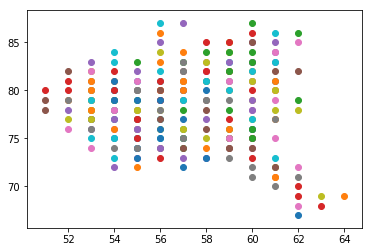

In [269]:
for x, y, _ in make_sample(250):
    plt.scatter(x, y)

In [238]:
df_cities, df_edges = generate_csv(50)
validate_input(df_cities, df_edges)

True

In [161]:
[1,2,3] == [1,2,4]

False

In [217]:
generate_csv(50)

(     x   y     name  quantity
 0   62  50   city_0        27
 1   63  43   city_1        78
 2   63  48   city_2        91
 3   62  49   city_3        66
 4   62  45   city_4         8
 5   62  46   city_5        61
 6   64  43   city_6        38
 7   62  45   city_7        48
 8   62  47   city_8        77
 9   61  46   city_9        14
 10  61  43  city_10        69
 11  64  45  city_11         3
 12  64  47  city_12        57
 13  63  44  city_13        37
 14  60  46  city_14        94
 15  63  45  city_15        21
 16  61  44  city_16        94
 17  64  46  city_17        24
 18  63  44  city_18        13
 19  63  47  city_19        94
 20  61  47  city_20        85
 21  60  45  city_21        43
 22  62  47  city_22        58
 23  62  45  city_23        36
 24  59  46  city_24        53
 25  61  46  city_25        60
 26  62  46  city_26        37
 27  64  45  city_27        31
 28  64  44  city_28        52
 29  62  51  city_29        48
 30  65  44  city_30        88
 31  62 